# Sentiment Analysis for Yelp Reviews Classification

In this NLP project we will classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

I have used the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [62]:
import nltk
import pandas as pd
import warnings
from nltk.corpus import stopwords

## The Data

In [5]:
yelp = pd.read_csv("yelp.csv")

In [6]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [13]:
yelp['text length'] = yelp['text'].apply(lambda n: len(n.split()))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86


# EDA

Let's explore the data

## Imports

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

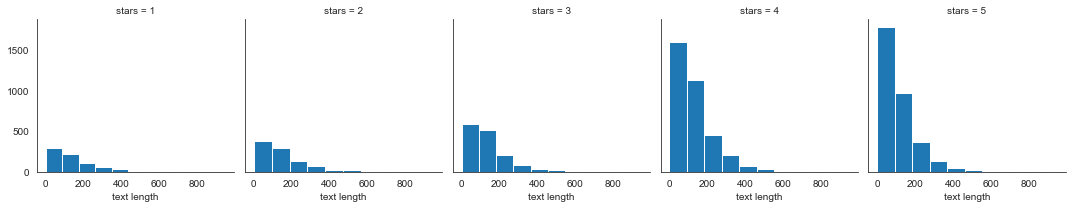

In [26]:
g = sns.FacetGrid(yelp, col = "stars")
g.map(plt.hist, "text length")
plt.show()

**Creating a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

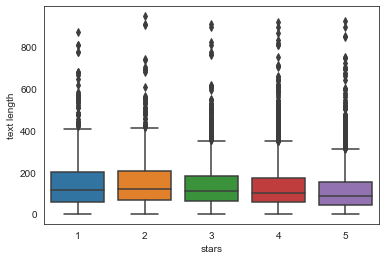

In [28]:
sns.boxplot(data=yelp, x="stars", y="text length")

**Creating a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

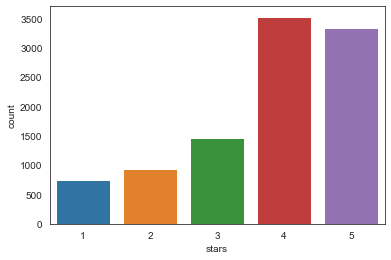

In [29]:
sns.countplot(data=yelp, x="stars")


**Using groupby to get the mean values of the numerical columns**

In [30]:
stars = yelp.groupby("stars").mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


In [31]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
text length,-0.865362,0.697506,0.847204,1.000000


<AxesSubplot:>

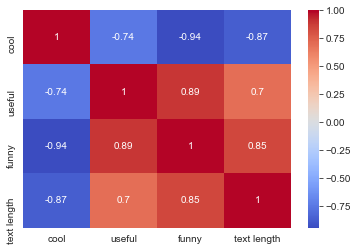

In [35]:
sns.heatmap(stars.corr(), cmap="coolwarm", annot=True)

## NLP Classification Task

Our task is to predict if a review is either bad or good, so let’s just grab reviews that are either 1 or 5 stars from the yelp dataframe. We can store the resulting reviews in a new dataframe called yelp_class.

In [55]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(4086, 11)

**Creating two objects X and y. X will be the 'text' column of yelp and y will be the 'stars' column of yelp**

In [56]:
X = yelp_class['text']
y = yelp_class['stars']

# Text pre-processing

In [57]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [63]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Vectorisation

In [64]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [ ]:
len(bow_transformer.vocabulary_)

In [66]:
review_100 = X[99]
review_100

"After the Padres Spring Training game, we had reservations at Don & Charlie's in Scottsdale .  None of us had been here before and it came highly recommended by my dad.  As soon as you walk into Don and Charlie's your eyes start feasting on all the signed baseballs down the left wall.  Now everywhere you look from floor to ceiling and even the ceiling itself is covered in memorabilia and autographed items from athletes of all sports and other celebrities.   Besides the amazing assortment of sports artifacts, I especially like the Cactus League Beer List which pairs a beer with each city that has a team in the Cactus League.  Colorado = Coors Light , Texas =Shiner Bock, Chicago =Old Style, and San Diego =Stone IPA, etc.  Also worth mentioning is the complimentary chopped liver platter with rye bread and bagel chips they bring as soon as you are seated.  I had the ribs with coconut shrimp combo which was great. I wasn't thrilled with the side dish: potato's au gratin which is a $2.50 up

In [69]:
bow_100 = bow_transformer.transform([review_100])
print(bow_100)

  (0, 246)	1
  (0, 304)	1
  (0, 909)	1
  (0, 1385)	1
  (0, 1420)	1
  (0, 1535)	1
  (0, 1856)	2
  (0, 2049)	2
  (0, 2093)	1
  (0, 2276)	1
  (0, 2343)	1
  (0, 2733)	1
  (0, 4253)	1
  (0, 4854)	2
  (0, 4909)	1
  (0, 4932)	1
  (0, 5286)	1
  (0, 5677)	1
  (0, 5746)	1
  (0, 5883)	1
  (0, 6070)	1
  (0, 7093)	1
  (0, 7159)	1
  (0, 7290)	1
  (0, 7546)	1
  :	:
  (0, 21979)	1
  (0, 22101)	1
  (0, 22160)	1
  (0, 22312)	1
  (0, 22672)	1
  (0, 22703)	2
  (0, 22729)	1
  (0, 22734)	1
  (0, 22876)	2
  (0, 22944)	1
  (0, 23133)	2
  (0, 23176)	1
  (0, 23359)	2
  (0, 23499)	1
  (0, 24154)	1
  (0, 24291)	1
  (0, 24563)	1
  (0, 25028)	1
  (0, 25375)	1
  (0, 25429)	1
  (0, 25747)	1
  (0, 25749)	1
  (0, 25756)	1
  (0, 25821)	1
  (0, 26230)	1


In [70]:
X = bow_transformer.transform(X)

In [71]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


## Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [75]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

**Using the predict method off of nb to predict labels from X_test.**

In [76]:
predictions = nb.predict(X_test)

**Creating a confusion matrix and classification report using these predictions and y_test**

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[157  71]
 [ 24 974]]


              precision    recall  f1-score   support

           1       0.87      0.69      0.77       228
           5       0.93      0.98      0.95       998

    accuracy                           0.92      1226
   macro avg       0.90      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



# Predicting a singular positive review


In [79]:
positive_review = yelp_class['text'][59]
positive_review

"This restaurant is incredible, and has the best pasta carbonara and the best tiramisu I've had in my life. All the food is wonderful, though. The calamari is not fried. The bread served with dinner comes right out of the oven, and the tomatoes are the freshest I've tasted outside of my mom's own garden. This is great attention to detail.\n\nI can no longer eat at any other Italian restaurant without feeling slighted. This is the first place I want take out-of-town visitors I'm looking to impress.\n\nThe owner, Jon, is helpful, friendly, and really cares about providing a positive dining experience. He's spot on with his wine recommendations, and he organizes wine tasting events which you can find out about by joining the mailing list or Facebook page."

In [87]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

**Our model thinks this review is positive, just as expected.**

# Predicting a singular negative review

In [81]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [82]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

**Our model is right again!**

# Where the model goes wrong…

In [83]:
another_negative_review = yelp_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [84]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

5

Our model thinks this review is positive, and that’s incorrect.

Why the incorrect prediction?
One explanation as to why this may be the case is that our initial dataset had a much higher number of 5-star reviews than 1-star reviews. This means that the model is more biased towards positive reviews compared to negative ones.

In conclusion, although our model was a little biased towards positive reviews, it was fairly accurate with its predictions, achieving an accuracy of 92% on the test set.



**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

In [46]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [47]:
from sklearn.pipeline import Pipeline

**creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [48]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

### Train Test Split

**Redoing the train test split on the yelp_class object.**

In [49]:
X = yelp['text']
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [50]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

### Predictions and Evaluation

**Now using the pipeline to predict from the X_test and creating a classification report and confusion matrix**

In [51]:
predictions = pipeline.predict(X_test)

In [54]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       220
           2       0.00      0.00      0.00       273
           3       1.00      0.00      0.00       443
           4       0.38      0.92      0.54      1064
           5       0.66      0.29      0.40      1000

    accuracy                           0.42      3000
   macro avg       0.41      0.24      0.19      3000
weighted avg       0.50      0.42      0.33      3000



Looks like Tf-Idf actually made things worse, most likely because of the special syntax of text messages the term frequency is not as significant.